<div style="font-family: Arial, sans-serif; font-size: 20px; line-height: 1.5; color: #ffffff; ;">

<h2 style="color: #ffb703;">📘 Importing Required Libraries</h2>

<p style="color: #f1faee;">
In this section, we import all <strong>necessary Python libraries</strong> to build and evaluate machine learning models.  
Each library has its own purpose in data loading, preprocessing, modeling, and visualization.
</p>

<ul style="color: #d0f4de;">
<li><strong>pandas</strong> → Used for data handling and analysis</li>
<li><strong>numpy</strong> → Supports mathematical & numerical operations</li>
<li><strong>train_test_split, GridSearchCV</strong> → Splits data & performs hyperparameter tuning</li>
<li><strong>StandardScaler</strong> → Feature scaling to improve model performance</li>
<li><strong>LogisticRegression, RandomForestClassifier</strong> → Machine learning algorithms</li>
<li><strong>accuracy_score, confusion_matrix, classification_report</strong> → Model evaluation metrics</li>
<li><strong>matplotlib, seaborn</strong> → Data visualization & plots</li>
<li><strong>warnings.filterwarnings('ignore')</strong> → Hides unnecessary warnings</li>
</ul>

<p style="color: #ffdd57;"><strong>👉 These imports prepare us for Data Processing, Model Training & Performance Evaluation!</strong></p>

</div>


In [35]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

<div style="font-family: Arial, sans-serif; font-size: 20px; line-height: 1.3; color: #ffffff;">

<h2 style="color: #06d6a0;">📍 Step 1: Loading the Dataset</h2>

<p style="color: #f1faee;">
In this step, we are <strong>bringing our dataset into Python</strong> so we can work with it.  
The dataset we are loading is named <strong><code>heart_disease.csv</code></strong>, which contains medical information about patients.  
Using this data, we will later <strong>predict whether a person has heart disease or not</strong>. ❤️⚕️
</p>

<p style="color: #ffd166;">
📌 <strong>What the code does:</strong>
</p>

<ul style="color: #d0f4de;">
<li>✔️ <code>pd.read_csv()</code> reads the CSV (Comma Separated Values) file and converts it into a <strong>DataFrame</strong></li>
<li>✔️ A DataFrame helps us view, analyze, and manipulate structured data easily</li>
<li>✔️ <code>df.head()</code> prints the <strong>first 5 rows</strong> of the dataset — useful to understand what data looks like</li>
</ul>


<p style="color: #ffdd57;">
👉 This helps us quickly check if data is loaded correctly and see the types of features we are working with!
</p>

</div>


In [36]:
# Step 1: Load Dataset
df = pd.read_csv('heart_disease.csv')

# Display first few rows
print("Dataset Sample:")
print(df.head())


Dataset Sample:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


<div style="font-family: Arial, sans-serif; font-size: 20px; line-height: 1.3; color: #ffffff;">

<h2 style="color: #f72585;">⚙️ Step 2: Data Preprocessing</h2>

<p style="color: #f1faee;">
Before training a Machine Learning model, the data must be cleaned and prepared properly.  
This step makes sure the model learns correctly and gives accurate predictions. 📊🤖
</p>

<h3 style="color: #ffd166;">🔹 1️⃣ Checking Missing Values</h3>
<p style="color: #d0f4de;">
We first check if the dataset has any <strong>empty or missing data</strong>.  
Missing data can confuse the model, so we look for them using:
</p>

<ul style="color: #d0f4de;">
<li><strong>df.isnull().sum()</strong> → Counts how many values are missing in each column</li>
</ul>


<h3 style="color: #ffd166;">🔹 2️⃣ Feature Scaling</h3>
<p style="color: #d0f4de;">
Machine Learning models perform better when all features (columns) are on a similar scale.  
For example, <code>age</code> may be between 20–80, but <code>cholesterol</code> may be 150–400.  
This difference can affect model learning.</p>

<p style="color: #a8dadc;">
👉 <strong>StandardScaler</strong> transforms data so each feature becomes:<br>
Mean = 0 and Standard Deviation = 1  
This ensures all features contribute equally to the model.
</p>

<ul style="color: #d0f4de;">
<li><code>X</code> → Input features (all columns except <code>target</code>)</li>
<li><code>y</code> → Output label (Heart Disease present: Yes/No)</li>
</ul>

<p style="color: #ffdd57;">
✨ After this step, the data is clean and standardized — ready for model training!
</p>

</div>


In [37]:
# Step 2: Data Preprocessing
# Handle missing values (if any)
print("\nMissing Values:\n", df.isnull().sum())

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['target']


Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<div style="font-family: Arial, sans-serif; font-size: 20px; line-height: 1.3; color: #ffffff; ">

<h2 style="color: #48cae4;">✂️ Step 3: Splitting the Dataset</h2>

<p style="color: #f1faee;">
To train a Machine Learning model properly, we must divide our dataset into two parts:
</p>

<ul style="color: #d0f4de;">
<li><strong>Training Set (80%)</strong> → Used to train the model 🧠</li>
<li><strong>Testing Set (20%)</strong> → Used to check model performance after training 🧪</li>
</ul>

<p style="color: #ffd166;">
Why do we do this? 🤔  
Because a model must be tested on data it has <strong>never seen before</strong> → ensures it can make correct predictions in the real world!
</p>

<h3 style="color: #a8dadc;">📌 Explanation of Key Parameters:</h3>

<ul style="color: #d0f4de;">
<li><strong>test_size=0.2</strong> → 20% data for testing</li>
<li><strong>random_state=42</strong> → Ensures same split every time (reproducibility)</li>
<li><strong>stratify=y</strong> → Keeps <code>target</code> class distribution same in both sets (very important in classification problems!)</li>
</ul>

<p style="color: #ffb703;">
👉 This helps avoid bias. If one class dominates the test set, accuracy becomes misleading!
</p>


<p style="color: #ffdd57;">
🎯 Now our model will train on training data and later be evaluated on the unseen test data!
</p>

</div>


In [38]:
# Step 3: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<div style="font-family: Arial, sans-serif; font-size: 20px; line-height: 1.3; color: #ffffff;">

<h2 style="color: #ff006e;">🤖 Step 4: Train Machine Learning Models</h2>

<p style="color: #f1faee;">
Now that our data is clean and ready, it’s time to <strong>train a model</strong> that can predict whether a person has heart disease or not. ❤️⚕️  
We start with a simple and powerful classification algorithm:  
</p>

<h3 style="color: #ffd166;">📌 Logistic Regression</h3>

<p style="color: #d0f4de;">
🔹 Logistic Regression is commonly used for <strong>binary classification</strong> problems — where output has only two classes:  
<br><strong>0 → No Heart Disease</strong> <br><strong>1 → Heart Disease</strong>  
</p>

<p style="color: #a8dadc;">
👉 The model learns patterns from the <strong>training data</strong> (X_train, y_train) and then predicts the target value for <strong>test data</strong> (X_test).
</p>

<h3 style="color: #fff;">✔️ Evaluating the Model</h3>

<p style="color: #d0f4de;">
We use <strong>accuracy_score</strong> to check how correct our model predictions are.  
It simply tells: “Out of all predictions, how many were correct?” 📈  
</p>


<p style="color: #ffdd57;">
🎯 If accuracy is high → model is performing well!  
This is our first model. More advanced models are coming next... 🚀
</p>

</div>


In [39]:
# Step 4: Train Multiple ML Models

# 1. Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_preds)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")


Logistic Regression Accuracy: 0.81


<div style="font-family: Arial, sans-serif; font-size: 20px; line-height: 1.3; color: #ffffff; ">

<h2 style="color: #4cc9f0;">🌲 Random Forest Classifier</h2>

<p style="color: #f1faee;">
After Logistic Regression, we use a more powerful ML algorithm called  
<strong>Random Forest Classifier</strong> 🌲🤖  
It works by combining multiple decision trees to make better and more reliable predictions.
</p>

<h3 style="color: #ffd166;">🔍 Why Random Forest?</h3>

<ul style="color: #d0f4de;">
<li>✔️ Handles large and complex data well</li>
<li>✔️ Less likely to overfit compared to a single decision tree</li>
<li>✔️ Works great for classification problems like heart disease prediction</li>
</ul>

<p style="color: #a8dadc;">
👉 Each tree gives its own prediction, and the forest chooses the **majority vote** as the final answer.
This improves accuracy and stability! 💪
</p>

<h3 style="color: #fff;">📈 Model Training + Accuracy Measurement</h3>

<p style="color: #d0f4de;">
We train the Random Forest model using our training data  
and then calculate how accurate the model is on unseen test data.
</p>

<p style="color: #ffdd57;">
🎯 Random Forest usually performs better than Logistic Regression because it learns more complex patterns!
</p>

</div>


In [40]:
# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 1.00


<div style="font-family: Arial, sans-serif; font-size: 20px; line-height: 1.3; color: #ffffff; ">

<h2 style="color: #90e0ef;">🏆 Step 5: Evaluate the Best Model</h2>

<p style="color: #f1faee;">
Now we have trained two models:  
<strong>Logistic Regression</strong> and <strong>Random Forest</strong>. 🤖📊  
But which one performs better?  
Here we compare both and choose the **best model** based on accuracy!
</p>


<h3 style="color: #ffd166;">🔍 Best Model Selection Logic</h3>

<ul style="color: #d0f4de;">
<li>If <strong>Random Forest Accuracy</strong> > <strong>Logistic Regression Accuracy</strong> → Choose Random Forest 🌲</li>
<li>Else → Choose Logistic Regression 📈</li>
</ul>

<p style="color: #a8dadc;">
✔️ The selected model then makes predictions  
✔️ We evaluate the model using:
</p>

<ul style="color: #d0f4de;">
<li><strong>Accuracy Score</strong> → How many predictions were correct?</li>
<li><strong>Classification Report</strong> → Precision, Recall & F1-score 📑</li>
<li><strong>Confusion Matrix</strong> → Correct vs Wrong predictions table 🧮</li>
</ul>


<p style="color: #ffdd57;">
🎯 Final Goal: Find the most reliable model that predicts heart disease correctly and helps in better medical decisions ❤️🩺
</p>

</div>


In [41]:
# Step 5: Evaluate the Best Model
best_model = rf_model if rf_accuracy > log_accuracy else log_model
best_preds = rf_preds if rf_accuracy > log_accuracy else log_preds

print("\nBest Model Metrics:")
print("Accuracy Score:", accuracy_score(y_test, best_preds))
print("Classification Report:\n", classification_report(y_test, best_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_preds))


Best Model Metrics:
Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
 [[100   0]
 [  0 105]]


<div style="font-family: Arial, sans-serif; font-size: 20px; line-height: 1.3; color: #ffffff; ">

<h2 style="color: #ffafcc;">📊 Step 6: Confusion Matrix Visualization</h2>

<p style="color: #f1faee;">
A <strong>Confusion Matrix</strong> helps us understand how well the model made correct predictions.  
Instead of just accuracy, it shows exactly:
</p>

<ul style="color: #d0f4de;">
<li>✔️ How many patients were correctly predicted with heart disease</li>
<li>✔️ How many were correctly predicted with no heart disease</li>
<li>⚠️ Where the model made mistakes</li>
</ul>


<h3 style="color: #ffd166;">🧮 Meaning of the Matrix</h3>
<div style="color: #a8dadc;">
<strong>Rows → Actual Values</strong><br>
<strong>Columns → Predicted Values</strong><br><br>

- <strong>True Positive (TP)</strong>: Correctly predicted heart disease  
- <strong>True Negative (TN)</strong>: Correctly predicted no heart disease  
- <strong>False Positive (FP)</strong>: Model predicted disease but patient is healthy 😬  
- <strong>False Negative (FN)</strong>: Model missed the disease ❌ (most dangerous!)
</div>

<p style="color: #f7e196;">
✨ We visualize this using a heatmap for easier interpretation!
</p>


<p style="color: #ffdd57;">
🎯 This plot visually shows where our model performs great and where improvement is needed!
</p>

</div>


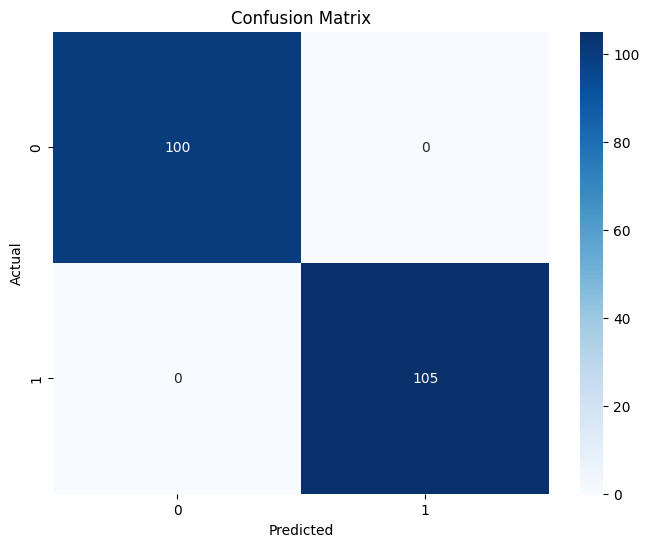

In [42]:
# Step 6: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, best_preds), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div style="font-family: Arial, sans-serif; font-size: 20px; line-height: 1.3; color: #ffffff; ">

<h2 style="color: #80ffdb;">🧾 Step 7: Making Predictions on New Patient Data</h2>

<p style="color: #f1faee;">
After training and testing our ML models, we now use the <strong>best model</strong> 🎯  
to predict heart disease for a <strong>new patient</strong>.  
This is the real-world use of Machine Learning! 🏥🤖
</p>

<h3 style="color: #ffd166;">📌 What is new_data?</h3>

<p style="color: #d0f4de;">
We create a new patient’s medical record as input features inside a DataFrame:  
</p>

<ul style="color: #a8dadc;">
<li><strong>age</strong> → Patient age</li>
<li><strong>sex</strong> → Male(1) / Female(0)</li>
<li><strong>cp</strong> → Chest pain type</li>
<li><strong>trestbps</strong> → Resting blood pressure</li>
<li><strong>chol</strong> → Cholesterol level</li>
<li><strong>thalach</strong> → Maximum heart rate</li>
<li><strong>...and more important medical values</strong></li>
</ul>

<p style="color: #f7e196;">
✨ These inputs help the model predict the chance of heart disease (0 or 1)
</p>



<p style="color: #ffdd57;">
🎯 We will scale this new data and make prediction in the next step!
</p>

</div>


In [45]:

# Step 7: Make Predictions on New Data
new_data = pd.DataFrame({
    'age': [45],
    'sex': [1],
    'cp': [2],
    'trestbps': [130],
    'chol': [230],
    'fbs': [0],
    'restecg': [1],
    'thalach': [150],
    'exang': [0],
    'oldpeak': [0.5],
    'slope': [2],
    'ca': [0],
    'thal': [2]
})


<div style="font-family: Arial, sans-serif; font-size: 20px; line-height: 1.3; color: #ffffff; ">

<h2 style="color: #bde0fe;">🔍 Step 8: Final Prediction on New Patient Data</h2>

<p style="color: #f1faee;">
Before predicting, we must apply the <strong>same scaling</strong> to new patient data  
that we applied to the training set.  
This keeps model input consistent and accurate! ⚖️🤖
</p>


<h3 style="color: #ffd166;">⚙️ Steps Performed</h3>

<ul style="color: #d0f4de;">
<li>➡️ Transform the new patient data using <strong>StandardScaler</strong></li>
<li>➡️ Use the <strong>best model</strong> selected earlier</li>
<li>➡️ Predict whether patient has heart disease or not</li>
</ul>

<p style="color: #a8dadc;">
✔️ Output will be:
</p>

<ul style="color: #d0f4de;">
<li><strong>1 → At Risk of Heart Disease 😟💔</strong></li>
<li><strong>0 → No Heart Disease 😄❤️‍🩹</strong></li>
</ul>

<p style="color: #ffdd57;">
🎯 Congratulations! You have successfully used a Machine Learning model  
to make a real-world medical prediction! 🏥🤖💙
</p>

</div>


In [46]:
# Scale new data
new_data_scaled = scaler.transform(new_data)
prediction = best_model.predict(new_data_scaled)
print("\nPrediction for New Data:", "At Risk of Heart Disease" if prediction[0] == 1 else "No Heart Disease")


Prediction for New Data: At Risk of Heart Disease
